In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uberdrives/My Uber Drives - 2016.csv


In [29]:
uber_data=pd.read_csv('/kaggle/input/uberdrives/My Uber Drives - 2016.csv')

In [30]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [31]:
print(uber_data.isnull().sum())

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [32]:
uber_data=uber_data.dropna()

In [33]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [34]:
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE*'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE*'], errors='coerce')


In [35]:
# Extract components from START_DATE
uber_data['Start_Day'] = uber_data['START_DATE'].dt.day
uber_data['Start_DayOfWeek'] = uber_data['START_DATE'].dt.day_name()  # Or use .dt.dayofweek for numeric
uber_data['Start_Month'] = uber_data['START_DATE'].dt.month_name()  # Or use .dt.month for numeric
uber_data['Start_Year'] = uber_data['START_DATE'].dt.year
uber_data['Start_Hour'] = uber_data['START_DATE'].dt.hour
uber_data['Start_Minute'] = uber_data['START_DATE'].dt.minute


In [36]:
# Extract components from END_DATE
uber_data['End_Day'] = uber_data['END_DATE'].dt.day
uber_data['End_DayOfWeek'] = uber_data['END_DATE'].dt.day_name()  # Or use .dt.dayofweek for numeric
uber_data['End_Month'] = uber_data['END_DATE'].dt.month_name()  # Or use .dt.month for numeric
uber_data['End_Year'] = uber_data['END_DATE'].dt.year
uber_data['End_Hour'] = uber_data['END_DATE'].dt.hour
uber_data['End_Minute'] = uber_data['END_DATE'].dt.minute


In [45]:
uber_data['Trip_Duration_Minutes'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60


more accurate info. about DAY,TIME and DATE of uber ride.

In [46]:
print(uber_data.head())


      START_DATE*       END_DATE* CATEGORY*           START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business      Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business      Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business      Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business      Fort Pierce  West Palm Beach   
5  1/6/2016 17:15  1/6/2016 17:19  Business  West Palm Beach  West Palm Beach   

   MILES*         PURPOSE*          START_DATE            END_DATE  Start_Day  \
0     5.1   Meal/Entertain 2016-01-01 21:11:00 2016-01-01 21:17:00          1   
2     4.8  Errand/Supplies 2016-01-02 20:25:00 2016-01-02 20:38:00          2   
3     4.7          Meeting 2016-01-05 17:31:00 2016-01-05 17:45:00          5   
4    63.7   Customer Visit 2016-01-06 14:42:00 2016-01-06 15:49:00          6   
5     4.3   Meal/Entertain 2016-01-06 17:15:00 2016-01-06 17:19:00          6   

   ... Start_Year Start_Ho

<Axes: xlabel='CATEGORY*', ylabel='count'>

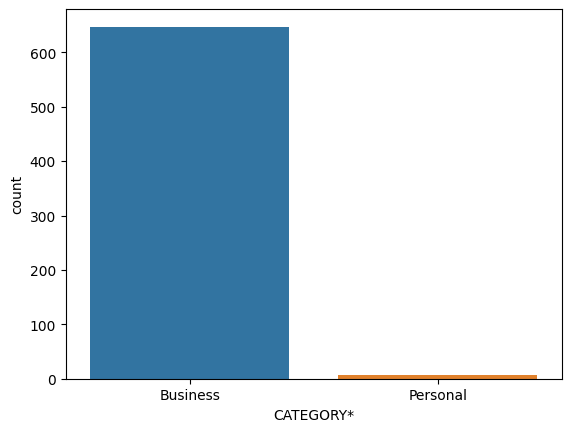

In [47]:
sns.countplot(x='CATEGORY*', data=uber_data)

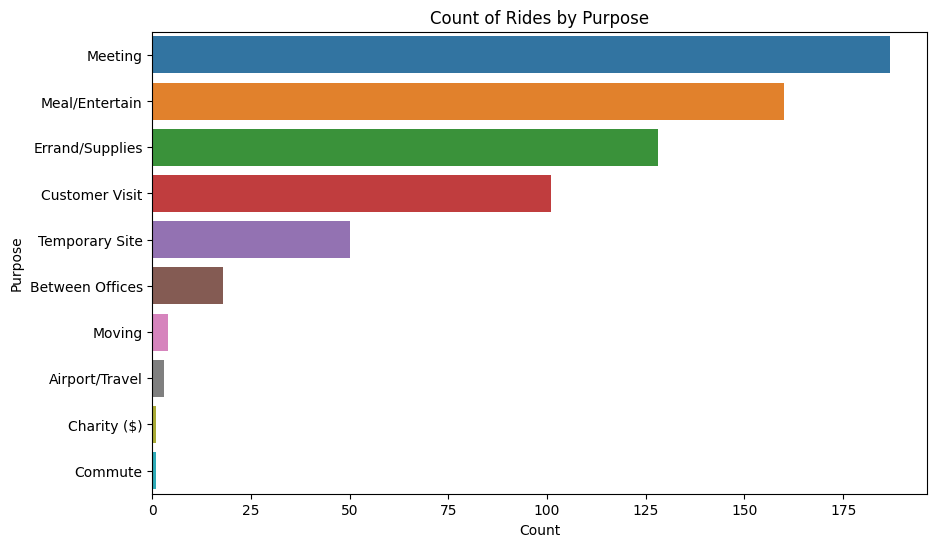

In [48]:
# Create a horizontal count plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.countplot(y='PURPOSE*', data=uber_data, order=uber_data['PURPOSE*'].value_counts().index)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.title("Count of Rides by Purpose")
plt.show()

We can conclude here that users with client-oriented industry are more frequent uber users.

<Axes: ylabel='Frequency'>

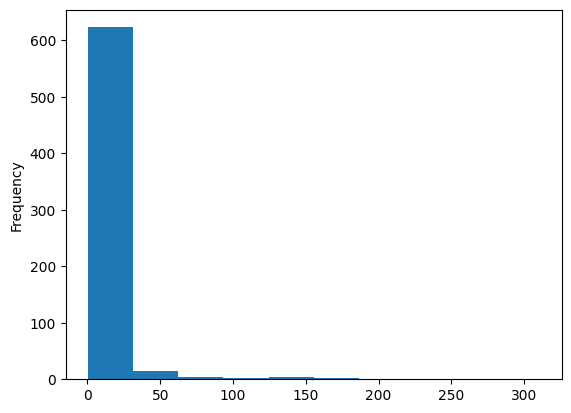

In [49]:
uber_data['MILES*'].plot.hist()

distance travelled is short.

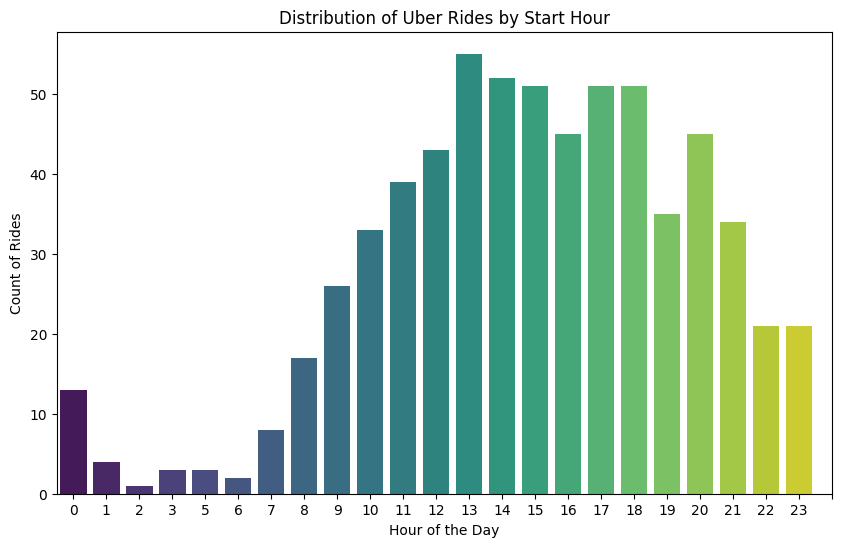

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot based on the START_HOUR column
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.countplot(x='Start_Hour', data=uber_data, palette='viridis')

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Rides")
plt.title("Distribution of Uber Rides by Start Hour")
plt.xticks(range(24))  # Ensure all hours (0-23) are displayed on the x-axis
plt.show()


around NOON(1pm to 3pm) there are more count of rides.

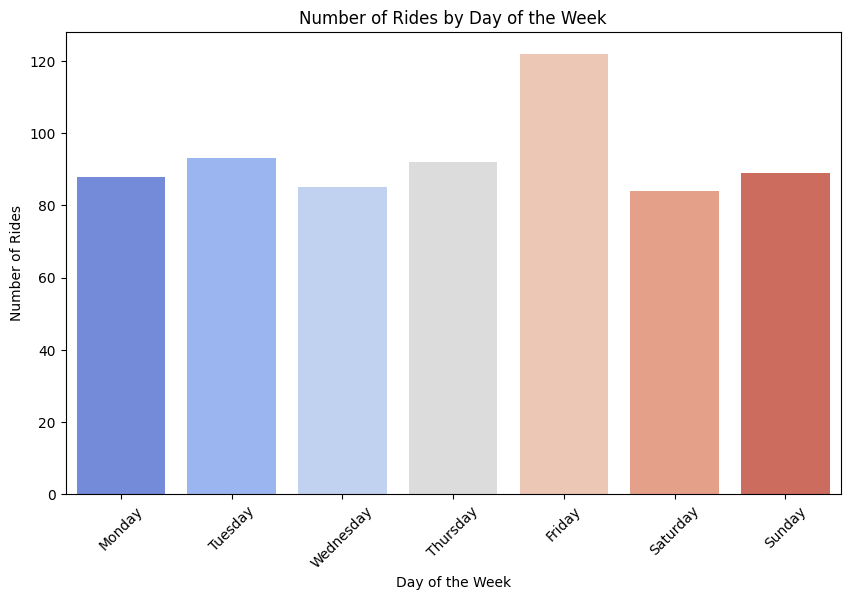

In [53]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.countplot(x='End_DayOfWeek', data=uber_data, 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              palette='coolwarm')

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by Day of the Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Friday has highest number of uber rides.

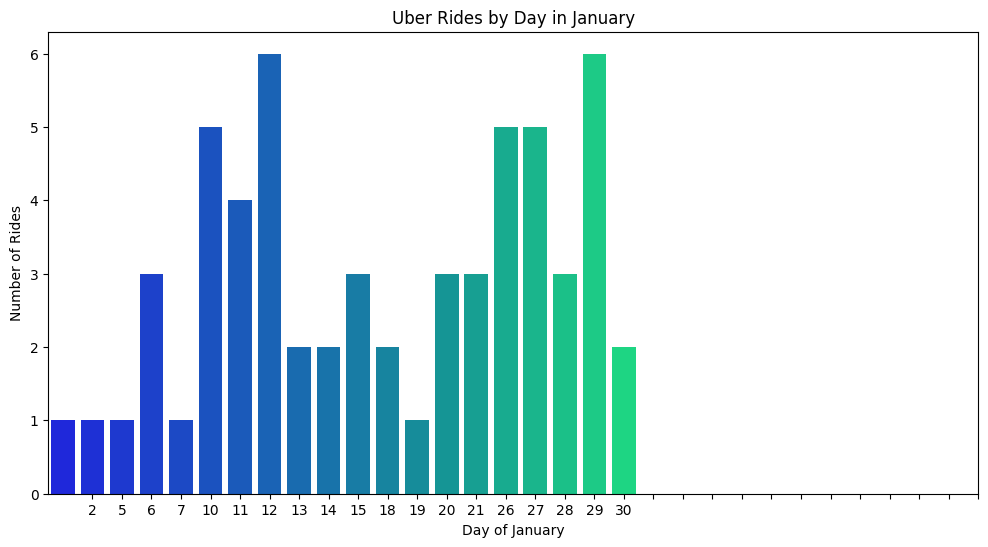

In [54]:
january_data = uber_data[uber_data['End_Month'] == 'January']

# Plot the distribution of rides by day in January
plt.figure(figsize=(12, 6))
sns.countplot(x=january_data['START_DATE'].dt.day, palette='winter', order=sorted(january_data['START_DATE'].dt.day.unique()))

# Add labels and title
plt.xlabel("Day of January")
plt.ylabel("Number of Rides")
plt.title("Uber Rides by Day in January")
plt.xticks(range(1, 32))  # Days in January (1-31)
plt.show()

on 12th and 29th january there are highest number of rides.

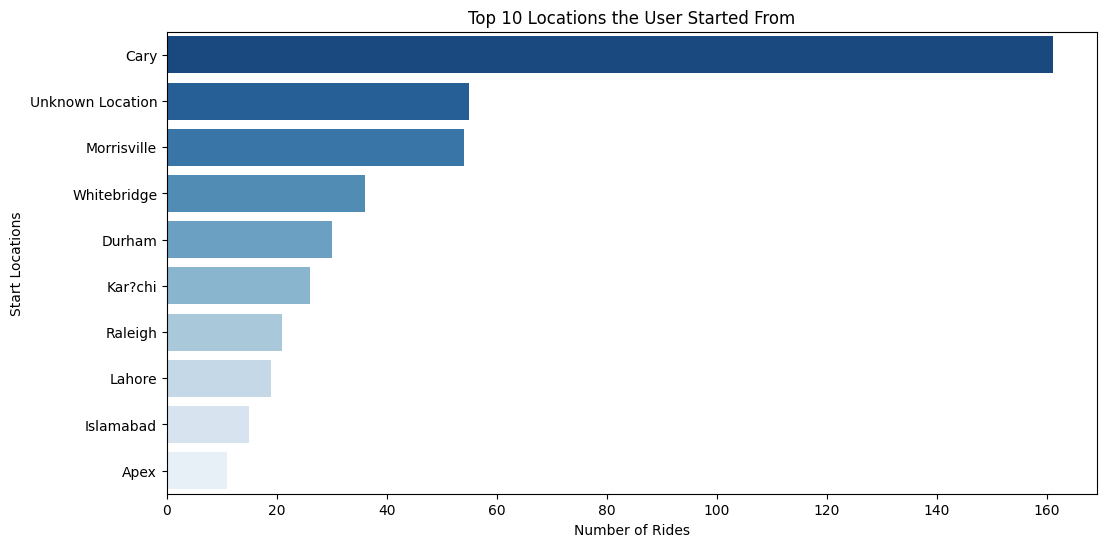

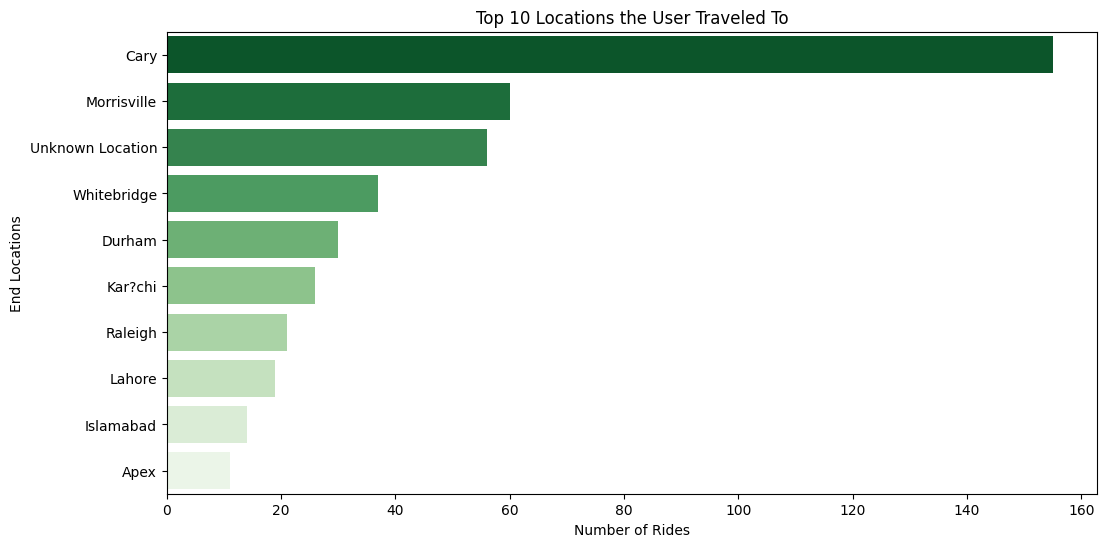

In [55]:
# Top locations the user started from
start_location_counts = uber_data['START*'].value_counts().head(10)

# Top locations the user traveled to
end_location_counts = uber_data['STOP*'].value_counts().head(10)

# Plot for START_LOCATION
plt.figure(figsize=(12, 6))
sns.barplot(x=start_location_counts.values, y=start_location_counts.index, palette='Blues_r')
plt.title("Top 10 Locations the User Started From")
plt.xlabel("Number of Rides")
plt.ylabel("Start Locations")
plt.show()

# Plot for END_LOCATION
plt.figure(figsize=(12, 6))
sns.barplot(x=end_location_counts.values, y=end_location_counts.index, palette='Greens_r')
plt.title("Top 10 Locations the User Traveled To")
plt.xlabel("Number of Rides")
plt.ylabel("End Locations")
plt.show()

In [105]:
# Encode categorical variables (START_LOCATION, END_LOCATION)
encoder = LabelEncoder()
uber_data['START*'] = encoder.fit_transform(uber_data['START*'])
uber_data['STOP*'] = encoder.fit_transform(uber_data['STOP*'])

In [106]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# Step 1: Data Preprocessing
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'])
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'])

In [109]:
# Select all one-hot encoded purpose columns
purpose_columns = [col for col in uber_data.columns if col.startswith('PURPOSE*_')]

# Combine one-hot encoded columns into a single column
def get_original_purpose(row):
    for col in purpose_columns:
        if row[col] == 1:
            return col.replace('PURPOSE*_', '')  # Extract the original purpose name
    return None

# Create the single-purpose column
uber_data['PURPOSE*'] = uber_data.apply(get_original_purpose, axis=1)

# Drop the one-hot encoded columns if no longer needed
uber_data.drop(columns=purpose_columns, inplace=True)

# Check the dataset
print(uber_data[['PURPOSE*']].head())


          PURPOSE*
0   Meal/Entertain
2  Errand/Supplies
3          Meeting
4   Customer Visit
5   Meal/Entertain


In [110]:
# Step 2: Define Features and Target
X = uber_data[['Start_Hour', 'End_Hour', 'Start_DayOfWeek', 'End_DayOfWeek', 'START*', 'STOP*']]
y = uber_data['PURPOSE*']  # Target variable (categorical)

In [111]:
print(uber_data.columns)


Index(['START_DATE*', 'END_DATE*', 'START*', 'STOP*', 'MILES*', 'START_DATE',
       'END_DATE', 'Start_Day', 'Start_DayOfWeek', 'Start_Month', 'Start_Year',
       'Start_Hour', 'Start_Minute', 'End_Day', 'End_DayOfWeek', 'End_Month',
       'End_Year', 'End_Hour', 'End_Minute', 'Trip_Duration_Minutes',
       'CATEGORY*_Personal', 'PURPOSE*'],
      dtype='object')


In [112]:
y = encoder.fit_transform(y)


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
rf_model = RandomForestClassifier(random_state=42)


In [115]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [116]:
print(uber_data.dtypes)


START_DATE*                      object
END_DATE*                        object
START*                            int64
STOP*                             int64
MILES*                          float64
START_DATE               datetime64[ns]
END_DATE                 datetime64[ns]
Start_Day                         int32
Start_DayOfWeek                   int64
Start_Month                       int64
Start_Year                        int32
Start_Hour                        int32
Start_Minute                      int32
End_Day                           int32
End_DayOfWeek                     int64
End_Month                         int64
End_Year                          int32
End_Hour                          int32
End_Minute                        int32
Trip_Duration_Minutes           float64
CATEGORY*_Personal                 bool
PURPOSE*                         object
dtype: object


In [117]:

# Label Encoding
label_encoder = LabelEncoder()
uber_data['End_DayOfWeek'] = label_encoder.fit_transform(uber_data['End_DayOfWeek'])

# Check the mapping
print(dict(enumerate(label_encoder.classes_)))


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [118]:
label_encoder = LabelEncoder()

# Example for Start_DayOfWeek
uber_data['Start_DayOfWeek'] = label_encoder.fit_transform(uber_data['Start_DayOfWeek'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Similarly, for Start_Month and End_Month
uber_data['Start_Month'] = label_encoder.fit_transform(uber_data['Start_Month'])
uber_data['End_Month'] = label_encoder.fit_transform(uber_data['End_Month'])

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [119]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estima

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [121]:
best_rf_model = grid_search_rf.best_estimator_


In [122]:
y_pred_rf = best_rf_model.predict(X_test)


In [123]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 34.35%


In [124]:
# Classification Report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           3       0.31      0.13      0.19        30
           4       0.26      0.37      0.30        27
           5       0.36      0.48      0.41        29
           6       0.44      0.50      0.47        30
           7       0.00      0.00      0.00         1
           8       0.33      0.18      0.24        11

    accuracy                           0.34       131
   macro avg       0.24      0.24      0.23       131
weighted avg       0.33      0.34      0.32       131



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


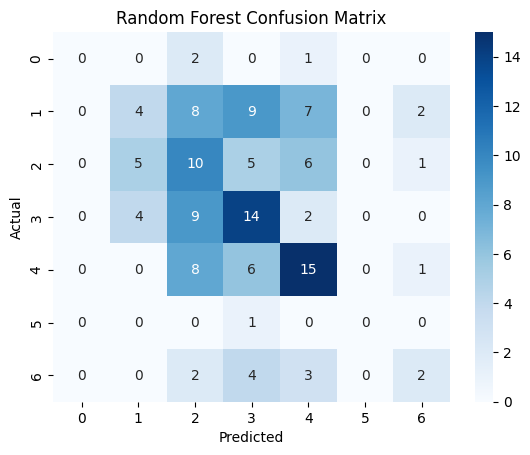

In [125]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [126]:
# Step 6: Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [127]:
# Logistic Regression Evaluation
y_pred_log_reg = log_reg_model.predict(X_test)

# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%')

# Classification Report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 29.01%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           3       0.25      0.03      0.06        30
           4       0.00      0.00      0.00        27
           5       0.30      0.45      0.36        29
           6       0.30      0.80      0.43        30
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        11

    accuracy                           0.29       131
   macro avg       0.12      0.18      0.12       131
weighted avg       0.19      0.29      0.19       131



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


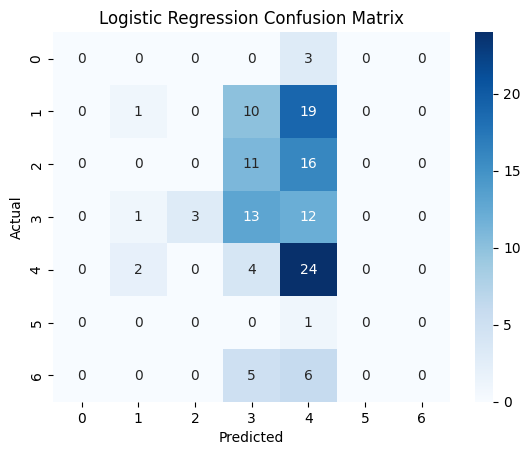

In [128]:
# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score


In [135]:
logistic_cv_accuracy = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy').mean()
rf_cv_accuracy = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy').mean()

# Print results
print("Logistic Regression Test Accuracy:", accuracy_log_reg )
print("Logistic Regression Cross-Validation Accuracy:", logistic_cv_accuracy)
print("Random Forest Test Accuracy:", accuracy_rf)
print("Random Forest Cross-Validation Accuracy:", rf_cv_accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Logistic Regression Test Accuracy: 0.2900763358778626
Logistic Regression Cross-Validation Accuracy: 0.29552554315913093
Random Forest Test Accuracy: 0.3435114503816794
Random Forest Cross-Validation Accuracy: 0.32166764533176745


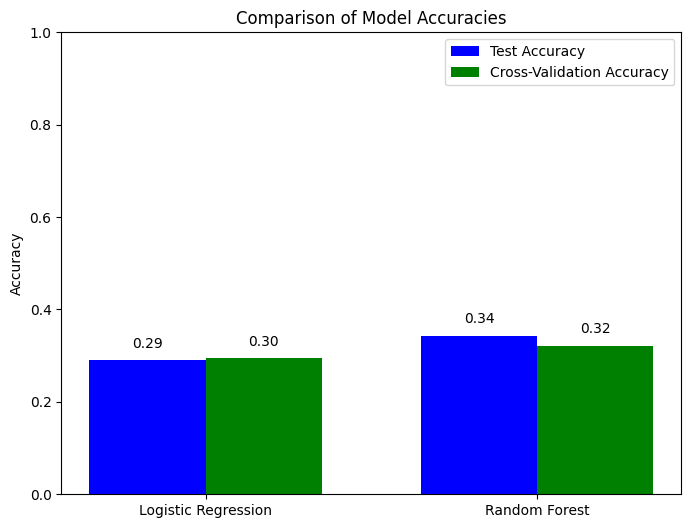

In [137]:

# Data for graphical representation
models = ['Logistic Regression', 'Random Forest']
test_accuracies = [accuracy_log_reg, accuracy_rf]
cv_accuracies = [logistic_cv_accuracy, rf_cv_accuracy]# Plotting the comparison
x = np.arange(len(models))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, test_accuracies, width, label='Test Accuracy', color='blue')
bars2 = ax.bar(x + width/2, cv_accuracies, width, label='Cross-Validation Accuracy', color='green')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate the bars with accuracy values
def annotate_bars(bars, accuracies):
    for bar, acc in zip(bars, accuracies):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{acc:.2f}', ha='center', va='bottom')

annotate_bars(bars1, test_accuracies)
annotate_bars(bars2, cv_accuracies)

plt.ylim(0, 1)  # Limit the y-axis to 0-1 for accuracy
plt.show()